**A kind request, please upvote if this kernel helps. These scripts are inspired from [Kaggler learning](http://https://www.kaggle.com/learn/overview) posts. **

This section covers follwoing aspects:
* Pandas basic plot functions,
* Basic style functions
* Subplots function
* Pairplot
* Heatplot

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_original = pd.read_csv("input/winemag-data_first150k.csv")

In [3]:
df_original.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

In [4]:
df_original.shape
#df_original.dim()

(150930, 11)

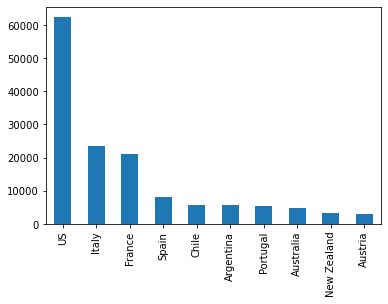

In [5]:
# bar plot
df_original['country'].value_counts().head(10).plot.bar()

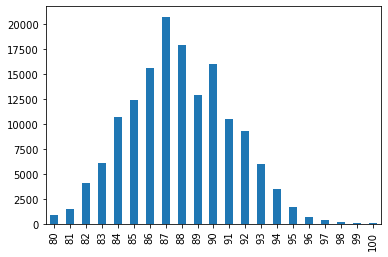

In [6]:
df_original['points'].value_counts().sort_index().plot.bar()

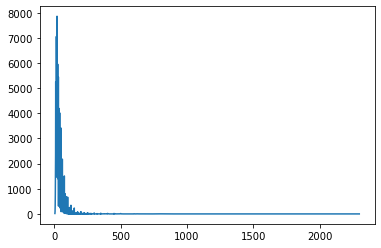

In [7]:
#Plot Price
df_original['price'].value_counts().sort_index().plot.line()

In [8]:
df_original['points'].value_counts().sort_index().plot.area()

In [9]:
#Scatter Plot
df_original.plot.scatter(x='points', y='price')

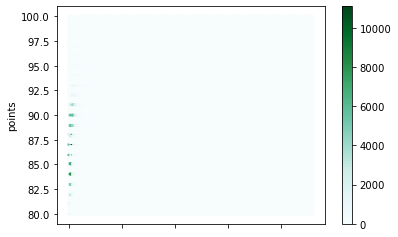

In [10]:
df_original.plot.hexbin(x='price', y='points')

In [11]:
# Figsize argument
df_original['points'].value_counts().sort_index().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    title = "Count of Wine-Points"
)

Text(0, 0.5, 'Count')

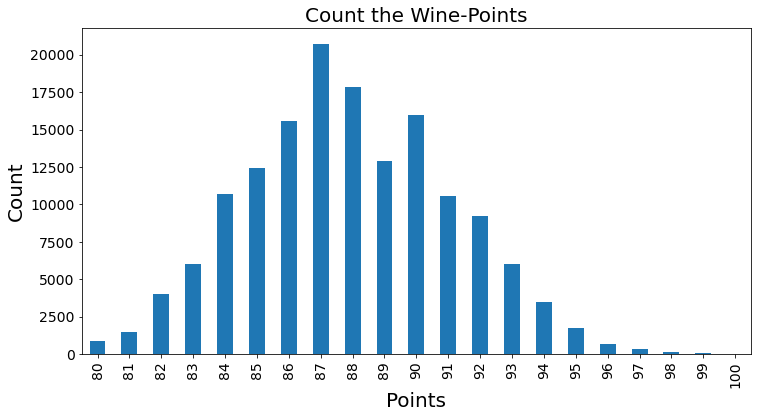

In [12]:
#Adjusting title fontsize using Matplotlib
import matplotlib as mlt

ax = df_original['points'].value_counts().sort_index().plot.bar(
    figsize = (12,6),
    fontsize = 14
)
ax.set_title("Count the Wine-Points", fontsize = 20)
ax.set_xlabel("Points", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)

Text(0.5, 1.0, 'No of Wines from Winery')

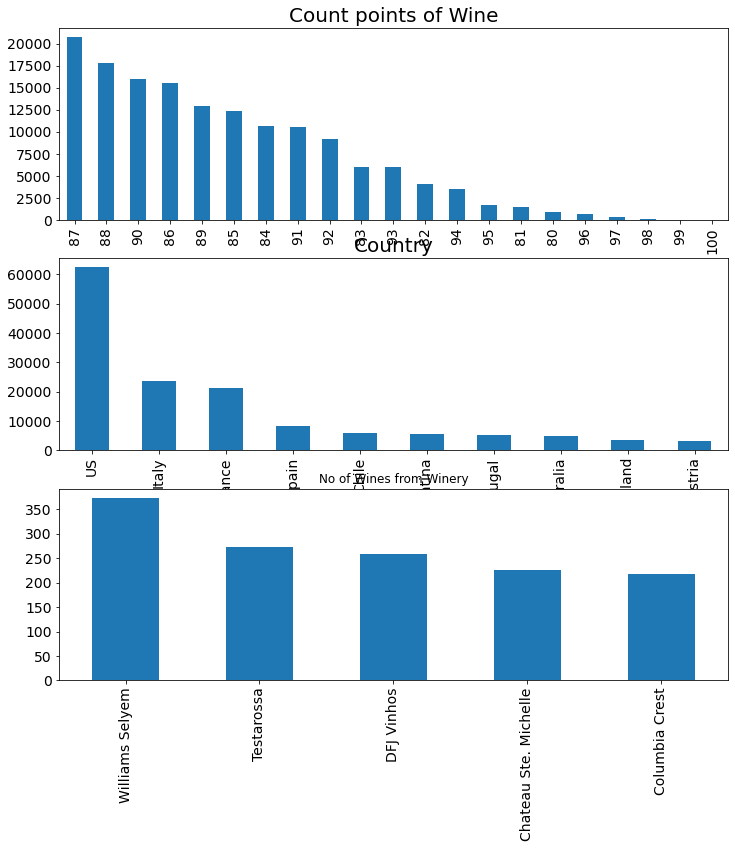

In [13]:
import matplotlib.pyplot as plt
#Creating a frame of rows and columns to place the plots
fig, axi = plt.subplots(3,1, figsize = (12,12))
#plot1
df_original['points'].value_counts().plot.bar(
    ax = axi[0],
    fontsize = 14    
)
axi[0].set_title("Count points of Wine", fontsize = 20)
#Plot2
df_original['country'].value_counts().head(10).plot.bar(
    ax = axi[1],
    fontsize = 14
)
axi[1].set_title('Country', fontsize = 20)
#plot3
df_original['winery'].value_counts().head().plot.bar(
    ax = axi[2],
    fontsize = 14
)
axi[2].set_title("No of Wines from Winery")

In [14]:
df_original.isnull().count()

Unnamed: 0     150930
country        150930
description    150930
designation    150930
points         150930
price          150930
province       150930
region_1       150930
region_2       150930
variety        150930
winery         150930
dtype: int64

# Exploring with *seaborn* package

In [15]:
 import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


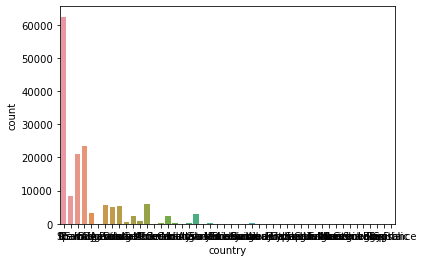

In [16]:
sns.countplot(df_original['country'])

In [17]:
sns.countplot(df_original['province'].head(20))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


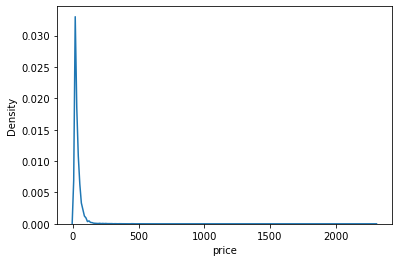

In [18]:
sns.kdeplot(df_original['price'])

Text(0.5, 1.0, 'Price of Wine')

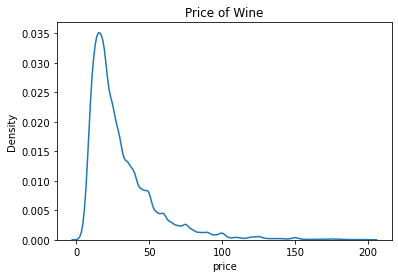

In [19]:
ax = sns.kdeplot(df_original.query('price < 200').price)
ax.set_title("Price of Wine")

In [20]:
#KDE 2D plot
#sns.kdeplot(df_original[df_original['price']< 200].loc[:,['price', 'points']].dropna().sample(5000))

# Histogram plot in *Seaborn*


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


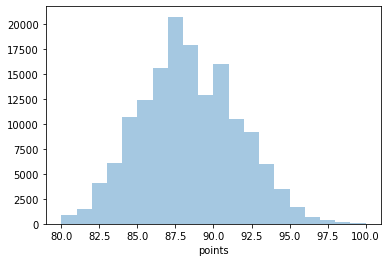

In [21]:
ax = sns.distplot(df_original['points'], bins = 20, kde = False)

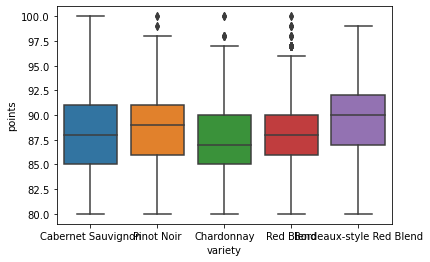

In [22]:
df1= df_original[df_original.variety.isin(df_original.variety.value_counts().head(5).index)]

sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df1
)

# Facet Grid

In [23]:
df_original.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

In [24]:
#Extract wine scores from two countries US and France
df = df_original[df_original['country'].isin(['US','France', 'Canada', 'Spain'])]
g = sns.FacetGrid(df, col = "country", col_wrap = 2)

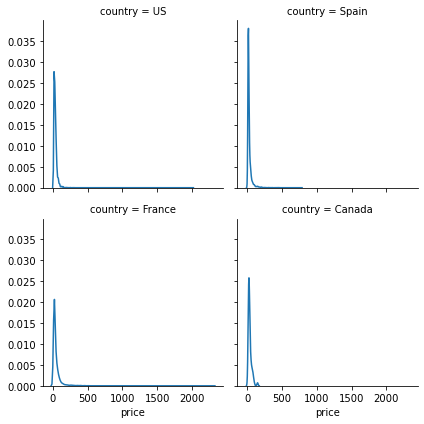

In [25]:
g = sns.FacetGrid(df, col = "country", col_wrap = 2)
g.map(sns.kdeplot, "price")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


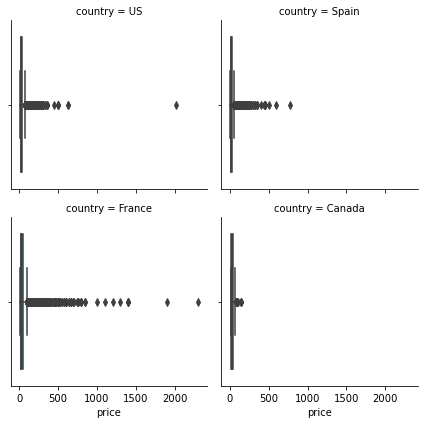

In [26]:
g = sns.FacetGrid(df, col = "country", col_wrap = 2)
g.map(sns.boxplot, "price")

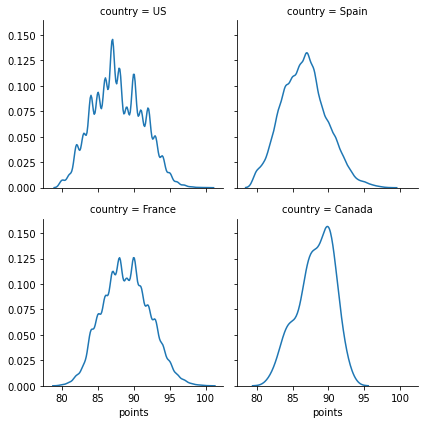

In [27]:
g = sns.FacetGrid(df, col = "country", col_wrap = 2)
g.map(sns.kdeplot, "points")

In [28]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col = "country", col_wrap = 2)

# Multi-Variant Plots

In [29]:
import re
import numpy as np

In [30]:
df_housing = pd.read_csv("input/melbourne-housing-market/Melbourne_housing_FULL.csv")

In [31]:
df_housing.head(3)

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford    68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  

[3 rows x 21 columns]

In [32]:
df_tmp = df_housing.dropna(how='any',axis=0) 

In [33]:
df_tmp.head()

Suburb          Address  Rooms Type      Price Method SellerG  \
2   Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
4   Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   
6   Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
11  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
14  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
2   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
4   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
6   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   
11  7/05/2016       2.5    3067.0  ...       2.0  0.0     245.0         210.0   
14  8/10/2016       2.5    3067.0  ...       1.0  2.0     256.0         107.0   

    YearBuilt         CouncilArea Lattitude  Longtitude  \
2      1900.0  Yarra City Council  -37.8079    144.9934   
4      1900.0  Yarra City Council  -37.8093    144.9944   
6      2014.0  Yarra City Council  -37.8072    144.9941   
11     1910.0  Yarra City Council  -37.8024    144.9993   
14     1890.0  Yarra City Council  -37.8060    144.9954   

               Regionname Propertycount  
2   Northern Metropolitan        4019.0  
4   Northern Metropolitan        4019.0  
6   Northern Metropolitan        4019.0  
11  Northern Metropolitan        4019.0  
14  Northern Metropolitan        4019.0  

[5 rows x 21 columns]

In [34]:
df_tmp2 = df_tmp[['Price', 'Distance', 'Rooms', 'Postcode', 'Bedroom2', 'Bathroom']]
df_tmp2.head()

Price  Distance  Rooms  Postcode  Bedroom2  Bathroom
2   1035000.0       2.5      2    3067.0       2.0       1.0
4   1465000.0       2.5      3    3067.0       3.0       2.0
6   1600000.0       2.5      4    3067.0       3.0       1.0
11  1876000.0       2.5      3    3067.0       4.0       2.0
14  1636000.0       2.5      2    3067.0       2.0       1.0

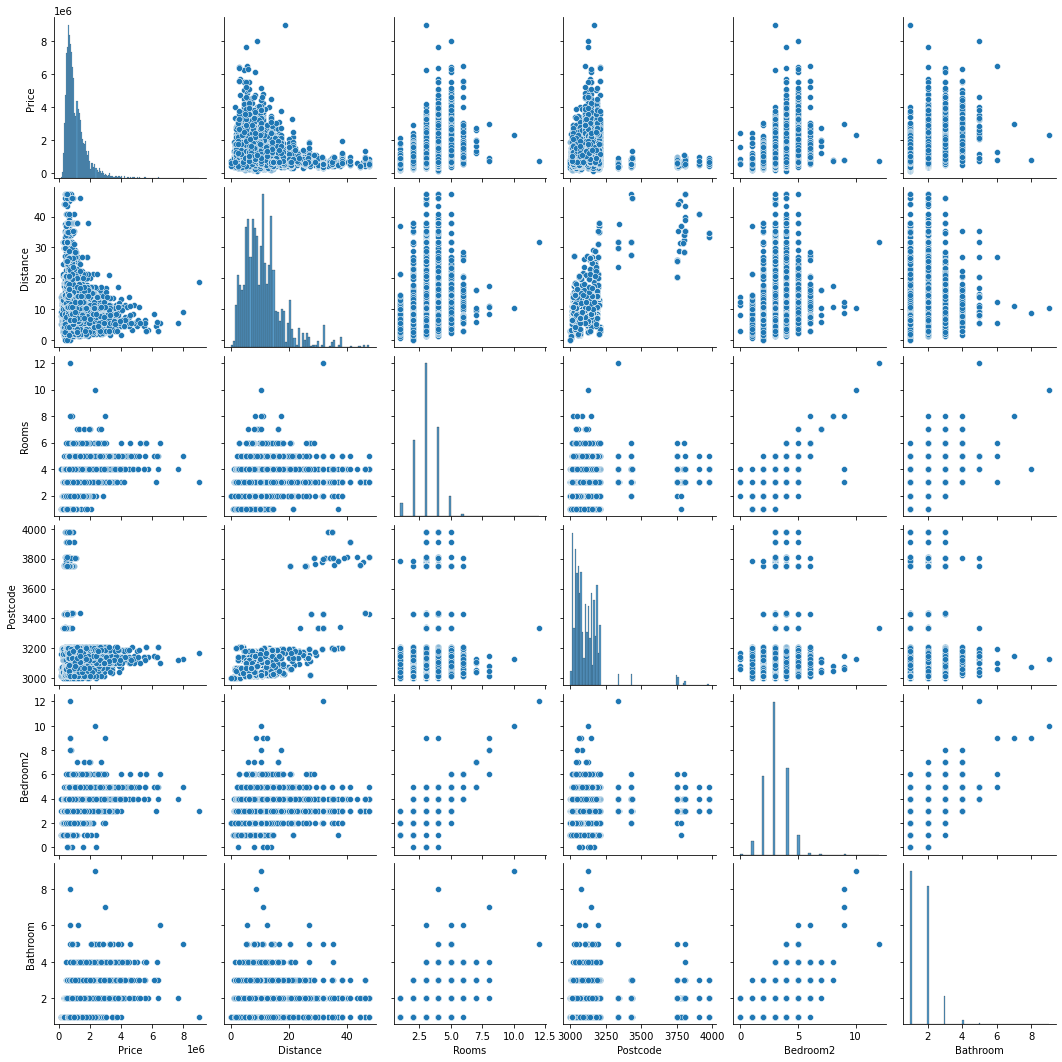

In [35]:
sns.pairplot(df_tmp2)

In [36]:
#check the colnaems
df_tmp.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

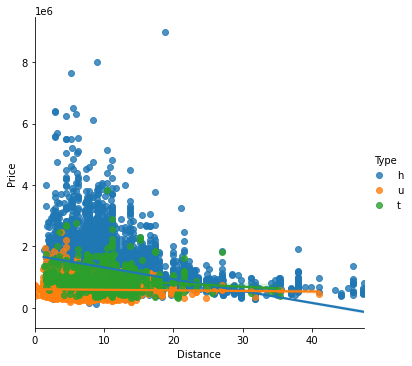

In [37]:
# Multivariant 
sns.lmplot(x='Distance', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

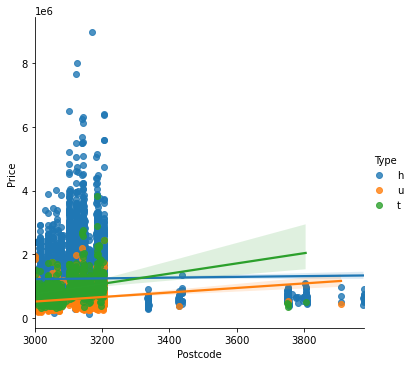

In [38]:
# Multivariant 
sns.lmplot(x='Postcode', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

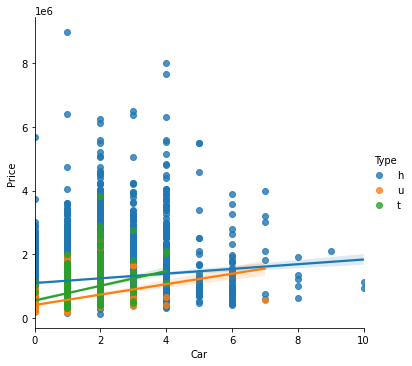

In [39]:
# Multivariant 
sns.lmplot(x='Car', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

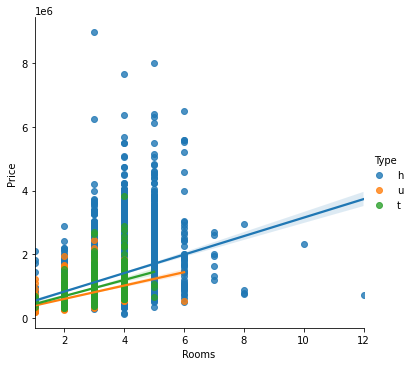

In [40]:
# Multivariant 
sns.lmplot(x='Rooms', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

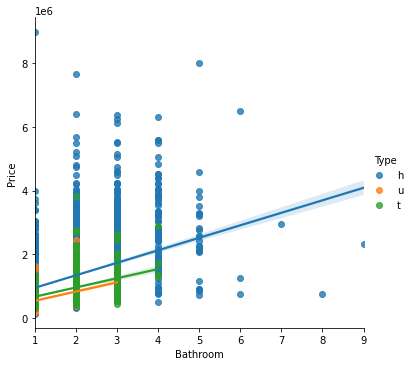

In [41]:
# Multivariant 
sns.lmplot(x='Bathroom', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

# Grouped boxplot

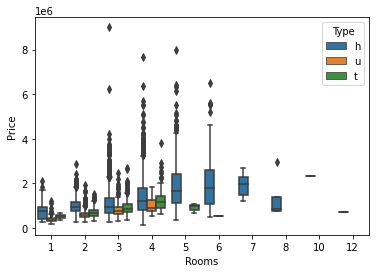

In [42]:
sns.boxplot(x='Rooms',
           y ='Price',
           hue = 'Type',
           data = df_tmp)

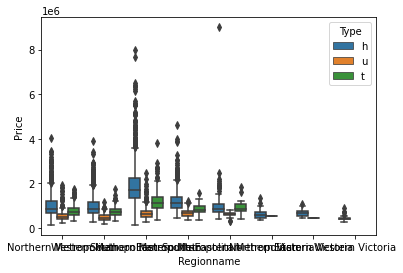

In [43]:
sns.boxplot(x='Regionname',
           y ='Price',
           hue = 'Type',
           data = df_tmp,
           )

# Heatplot


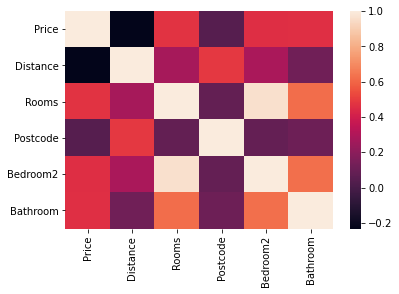

In [44]:
r = df_tmp2.corr()
sns.heatmap(r)

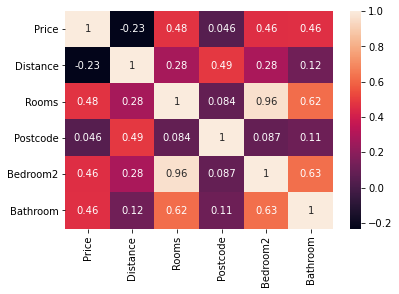

In [45]:
sns.heatmap(r, annot = True)